[View in Colaboratory](https://colab.research.google.com/github/NikhilNandoskar/Deep_Learning/blob/master/Tensorflow_for_Poets.ipynb)

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.2904 - acc: 0.9106 - val_loss: 0.0781 - val_acc: 0.9763
Epoch 2/10
45824/60000 [=====================>........] - ETA: 2s - loss: 0.0882 - acc: 0.9727

60000/60000 [==============================] - 10s 162us/step - loss: 0.0839 - acc: 0.9739 - val_loss: 0.0429 - val_acc: 0.9860
Epoch 3/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.0606 - acc: 0.9808 - val_loss: 0.0438 - val_acc: 0.9855
Epoch 4/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0486 - acc: 0.9844 - val_loss: 0.0368 - val_acc: 0.9885
Epoch 5/10
23808/60000 [==========>...................] - ETA: 4s - loss: 0.0379 - acc: 0.9875

60000/60000 [==============================] - 7s 119us/step - loss: 0.0417 - acc: 0.9872 - val_loss: 0.0299 - val_acc: 0.9902
Epoch 6/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0366 - acc: 0.9885 - val_loss: 0.0317 - val_acc: 0.9889
Epoch 7/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.0324 - acc: 0.9892 - val_loss: 0.0275 - val_acc: 0.9905
Epoch 8/10
22016/60000 [==========>...................] - ETA: 4s - loss: 0.0257 - acc: 0.9915

60000/60000 [==============================] - 8s 127us/step - loss: 0.0271 - acc: 0.9911 - val_loss: 0.0288 - val_acc: 0.9905
Epoch 9/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.0257 - acc: 0.9919 - val_loss: 0.0251 - val_acc: 0.9924
Epoch 10/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.0240 - acc: 0.9922 - val_loss: 0.0294 - val_acc: 0.9903
test loss 0.029388208904626664
test accuracy 0.9903


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


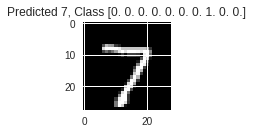

In [1]:
#Importing Libraries and Packages
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dense, Dropout

#Importing data:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#print("# of training examples in X_train", X_train.shape)
#print("# of test examples in X_train", X_test.shape)

#Reshaping input data:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
#print(type(X_train))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#print('x_train shape:', X_train.shape)
#print(X_train.shape[0], 'train samples')
#print(X_test.shape[0], 'test samples')
#Normalising the numbers in the range 0-1: Each Pixel value is 8 bits therefore 255
X_train /= 255
X_test /= 255
#Converting output to be one hot encoder:
y_train = np_utils.to_categorical(y_train, num_classes = 10)
y_test = np_utils.to_categorical(y_test, num_classes = 10)

#Building the CNN model
classifier = Sequential()

#Initializing CNN:
classifier.add(Conv2D(32,(3,3), input_shape = (28,28,1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

#Hidden Layer:
classifier.add(Conv2D(32,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

#Flattening
classifier.add(Flatten())

#Full Connection:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax'))

#Complining the CCNN:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Trainig the model:
classifier.fit(X_train, y_train, batch_size=128, epochs =10, verbose=1, validation_data=(X_test, y_test))

#Evaluate the model
score = classifier.evaluate(X_test, y_test, verbose = 0)
print('test loss', score[0])
print('test accuracy', score[1])

# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = classifier.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

#Plotting
plt.figure()
for i,correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
